Project - 2

Name: S V Arun Varma Vanaparthi

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Specify the directory where your CSV files are located
csv_directory = 'C:/Users/arunv/Downloads/data_5drivers/data_5drivers'  # Replace with the actual directory path

# Initialize an empty list to store DataFrames from each CSV file
dataframes = []

# Iterate through all files in the directory and read each CSV file into a DataFrame
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_directory, filename)
        data = pd.read_csv(file_path)
        dataframes.append(data)

# Concatenate all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Display column names to identify the correct names
print(combined_data.columns)

# Print the loaded DataFrame
print("Combined DataFrame:")
print(combined_data)




Index(['plate', 'longitude', 'latitude', 'time', 'status'], dtype='object')
Combined DataFrame:
        plate   longitude   latitude                 time  status
0           0  114.117165  22.539667  2016-07-01 00:00:03     1.0
1           4  114.035202  22.524950  2016-07-01 00:00:05     1.0
2           2  114.099480  22.546101  2016-07-01 00:00:09     0.0
3           1  113.993118  22.532232  2016-07-01 00:00:09     1.0
4           3  114.098465  22.569651  2016-07-01 00:00:13     1.0
...       ...         ...        ...                  ...     ...
4187008     2  114.036613  22.593834  2016-12-26 23:59:46     1.0
4187009     1  114.139336  22.579399  2016-12-26 23:59:49     0.0
4187010     4  114.064598  22.521799  2016-12-26 23:59:53     1.0
4187011     0  114.090248  22.558416  2016-12-26 23:59:55     1.0
4187012     3  114.118484  22.537683  2016-12-26 23:59:56     0.0

[4187013 rows x 5 columns]


In [5]:
# Preprocessing
X = combined_data[['longitude', 'latitude']].values 
y = combined_data['status'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification for 'status'
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Model evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Epoch 1/10
94208/94208 [==============================] - 118s 1ms/step - loss: 0.6648 - accuracy: 0.5755 - val_loss: 1.4179 - val_accuracy: 0.5790
Epoch 2/10
94208/94208 [==============================] - 119s 1ms/step - loss: 0.6576 - accuracy: 0.5836 - val_loss: 1.3122 - val_accuracy: 0.5858
Epoch 3/10
94208/94208 [==============================] - 475s 5ms/step - loss: 0.6537 - accuracy: 0.5895 - val_loss: 1.6356 - val_accuracy: 0.5913
Epoch 4/10
94208/94208 [==============================] - 179s 2ms/step - loss: 0.6515 - accuracy: 0.5923 - val_loss: 1.8386 - val_accuracy: 0.5944
Epoch 5/10
94208/94208 [==============================] - 168s 2ms/step - loss: 0.6497 - accuracy: 0.5943 - val_loss: 3.0016 - val_accuracy: 0.5937
Epoch 6/10
94208/94208 [==============================] - 250s 3ms/step - loss: 0.6473 - accuracy: 0.5979 - val_loss: 4.9217 - val_accuracy: 0.5971
Epoch 7/10
94208/94208 [==============================] - 229s 2ms/step - loss: 0.6456 - accuracy: 0.5996 - val_

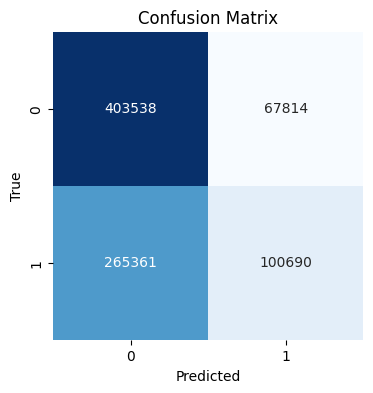

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


26169/26169 [==============================] - 24s 909us/step


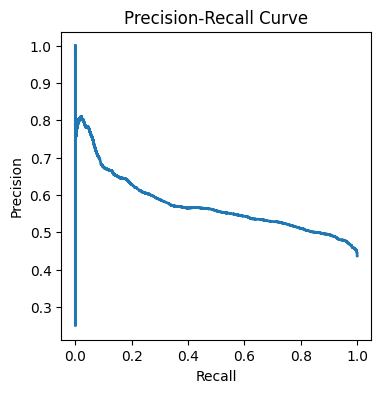

Average Precision Score: 0.5734861723287158


In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get probability scores from the model
y_pred_prob = model.predict(X_test)

# Flatten the probability scores if needed
y_pred_prob = y_pred_prob.flatten()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred_prob)
print('Average Precision Score:', avg_precision)
